In [3]:
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt
import time
import onedprojection
%matplotlib inline

In [4]:
n = 100
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')
b = np.zeros((n,))
x0 = np.random.rand(n)

# SD

total time took 0.0068171 seconds
iterations: 101


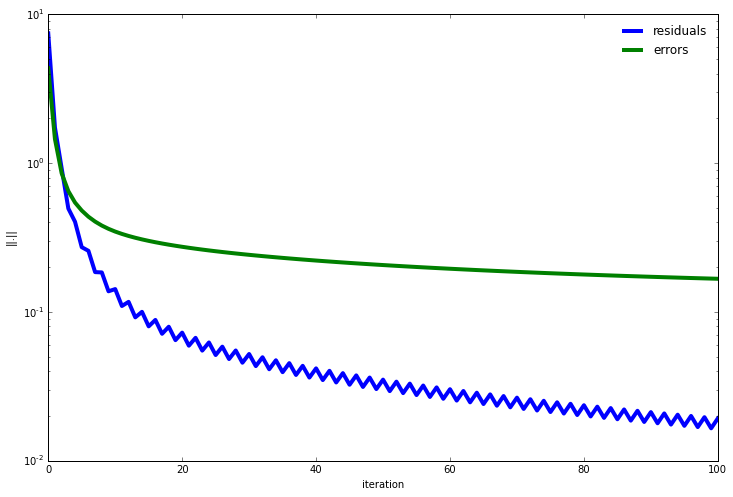

In [5]:
res = []
err = []

t1 = time.time()
x = onedprojection.onedprojection(A,b,x0=x0,tol=1e-8,residuals=res,method='SD',errs=err, maxiter=100)
t2 = time.time()

print("total time took %g seconds"%(t2-t1))
print("iterations: %d"%(len(res)))

plt.figure(figsize=(12,8))
plt.semilogy(res, label='residuals', lw=4)
plt.hold(True)
plt.semilogy(err, label='errors', lw=4)
plt.xlabel("iteration")
plt.ylabel("||.||")
plt.legend(frameon=False)

In [4]:
for (q,st) in zip([res,err],['residuals','errors']):
    q = np.array(q)
    a_factor = sp.mean(q[1:]/q[0:-1])
    g_factor = (q[-1]/q[0])**(1.0/len(q))
    i_factor = q[-1]/q[-2]
    print("%s: geometric factor: %g"%(st,g_factor))
    print("%s: average factor: %g"%(st,a_factor))
    print("%s: immediate factor: %g"%(st,i_factor))
    
(lmax,v)=sla.eigs(A,k=1,which='LM',maxiter=10000)
(lmin,v)=sla.eigs(A,k=1,which='SM',maxiter=10000)
lmax=lmax[0].real
lmin=lmin[0].real
bound = (lmax-lmin)/(lmax+lmin)
print("theoretical convergence factor = %g"%(bound))

residuals: geometric factor: 0.941512
residuals: average factor: 0.957498
residuals: immediate factor: 1.11924
errors: geometric factor: 0.96801
errors: average factor: 0.973478
errors: immediate factor: 0.997546
theoretical convergence factor = 0.999516


# MR

total time took 0.00870585 seconds
iterations: 101


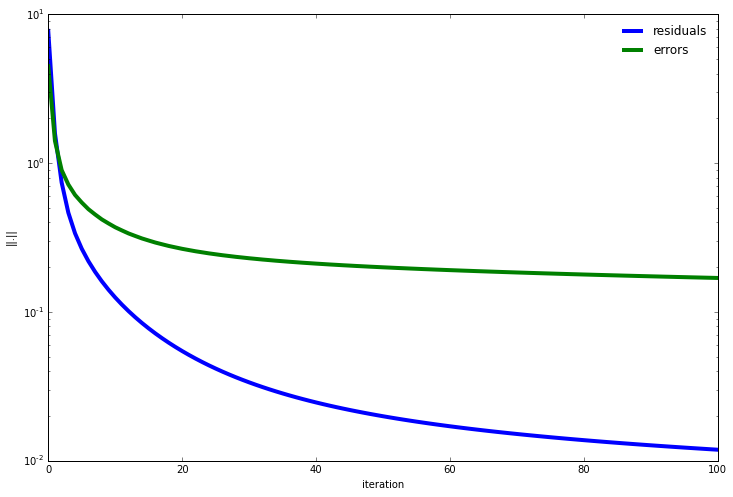

In [5]:
res = []
err = []

t1 = time.time()
x = onedprojection.onedprojection(A,b,x0=x0,tol=1e-8,residuals=res,method='MR',errs=err, maxiter=100)
t2 = time.time()

print("total time took %g seconds"%(t2-t1))
print("iterations: %d"%(len(res)))

plt.figure(figsize=(12,8))
plt.semilogy(res, label='residuals', lw=4)
plt.hold(True)
plt.semilogy(err, label='errors', lw=4)
plt.xlabel("iteration")
plt.ylabel("||.||")
plt.legend(frameon=False)

# RNSD

total time took 0.014329 seconds
iterations: 101


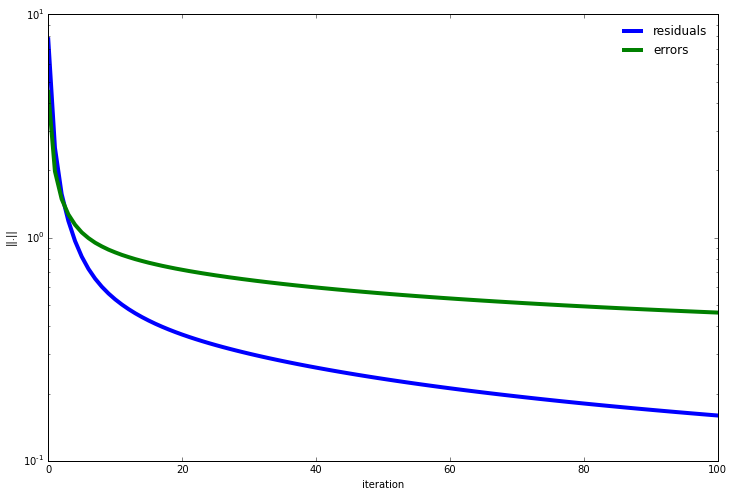

In [6]:
res = []
err = []

t1 = time.time()
x = onedprojection.onedprojection(A,b,x0=x0,tol=1e-8,residuals=res,method='RNSD',errs=err, maxiter=100)
t2 = time.time()

print("total time took %g seconds"%(t2-t1))
print("iterations: %d"%(len(res)))

plt.figure(figsize=(12,8))
plt.semilogy(res, label='residuals', lw=4)
plt.hold(True)
plt.semilogy(err, label='errors', lw=4)
plt.xlabel("iteration")
plt.ylabel("||.||")
plt.legend(frameon=False)